# Лабораторная работа 2


**Тема**: Обработка признаков (часть 1)

**Курс**: Методы машинного обучения

**Группа**: ИУ5-23М

**Студент**: Костарев А. П.

## Цель

Изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

## Задание

1.	Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.

2.	Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:

  1. устранение пропусков в данных;
  1. кодирование категориальных признаков;
  1. нормализация числовых признаков.


## Выполнение задания

### Текстовое описание датасета

В качестве датасета будем использовать набор данных, содержащий данные о смартфонах. Данный набор доступен по адресу: https://www.kaggle.com/datasets/informrohit1/smartphones-dataset

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

### Загрузка данных

In [2]:
data = pd.read_csv('smartphones_cleaned_v6.csv')

### Первичный анализ данных

Выведем первые 5 строк датасета:

In [3]:
data.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


Определим размер датасета:

In [4]:
data.shape

(980, 26)

In [5]:
data.dtypes

brand_name                    object
model                         object
price                          int64
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                   int64
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
extended_upto                float64
resolution_width               int64
resolution_height              int64
dtype: object

Проверим наличие пропусков:

In [6]:
data.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

### Устранение пропусков в данных

Удалим колонки, содержащие пустые значения:

In [7]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((980, 26), (980, 16))

Выведем первые строки датасета на экран:

In [8]:
data_new_1

,brand_name,model,price,has_5g,has_nfc,has_ir_blaster,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,extended_memory_available,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,True,True,False,1,12.0,256.0,6.70,120,3,50.0,0,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,True,False,False,1,6.0,128.0,6.59,120,3,64.0,1,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,True,False,False,1,4.0,64.0,6.60,90,3,50.0,1,1080,2408
3,motorola,Motorola Moto G62 5G,14999,True,False,False,1,6.0,128.0,6.55,120,3,50.0,1,1080,2400
4,realme,Realme 10 Pro Plus,24999,True,False,False,1,6.0,128.0,6.70,120,3,108.0,0,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,True,False,False,1,8.0,128.0,6.67,120,3,64.0,0,1080,2460
976,honor,Honor X8 5G,14990,True,False,False,1,6.0,128.0,6.50,60,3,48.0,1,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,True,True,True,1,8.0,256.0,6.60,144,3,64.0,0,1080,2460
978,motorola,Motorola Moto G91 5G,19990,True,True,False,1,6.0,128.0,6.80,60,3,108.0,1,1080,2400


Удалим строки, содержащие пустые значения:

In [9]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((980, 26), (352, 26))

In [10]:
data_new_2.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,8.0,1,1024.0,1080,2408
10,realme,Realme 10 Pro,18999,82.0,True,False,False,snapdragon,8.0,2.2,...,120,2,1.0,android,108.0,16.0,1,1024.0,1080,2400
13,vivo,Vivo T1 5G (6GB RAM + 128GB),16990,80.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2408


Заполним все пропущенные значения нулями:

In [11]:
data_new_3 = data.fillna(0)

Выведем на экран:

In [12]:
data_new_3.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,0.0,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,0.0,1080,2412


#### Обработка пропусков в числовых данных

Выберем числовые столбцы с пропущенными значениями и посчитаем количество пустых значений:

In [13]:
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Столбец {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Столбец rating. Тип данных float64. Количество пустых значений 101, 10.31%.
Столбец num_cores. Тип данных float64. Количество пустых значений 6, 0.61%.
Столбец processor_speed. Тип данных float64. Количество пустых значений 42, 4.29%.
Столбец battery_capacity. Тип данных float64. Количество пустых значений 11, 1.12%.
Столбец fast_charging. Тип данных float64. Количество пустых значений 211, 21.53%.
Столбец num_front_cameras. Тип данных float64. Количество пустых значений 4, 0.41%.
Столбец primary_camera_front. Тип данных float64. Количество пустых значений 5, 0.51%.
Столбец extended_upto. Тип данных float64. Количество пустых значений 480, 48.98%.


Отфильтруем по столбцам:

In [14]:
data_num = data[num_cols]
data_num

,rating,num_cores,processor_speed,battery_capacity,fast_charging,num_front_cameras,primary_camera_front,extended_upto
0,89.0,8.0,3.20,5000.0,100.0,1.0,16.0,NaN
1,81.0,8.0,2.20,5000.0,33.0,1.0,16.0,1024.0
2,75.0,8.0,2.40,5000.0,15.0,1.0,13.0,1024.0
3,81.0,8.0,2.20,5000.0,NaN,1.0,16.0,1024.0
4,82.0,8.0,2.60,5000.0,67.0,1.0,16.0,NaN
...,...,...,...,...,...,...,...,...
975,83.0,8.0,3.00,5000.0,68.0,1.0,16.0,NaN
976,75.0,8.0,2.20,5000.0,22.0,1.0,8.0,1024.0
977,85.0,8.0,2.85,5080.0,67.0,1.0,16.0,NaN
978,80.0,8.0,2.20,5000.0,NaN,1.0,32.0,1024.0


Гистограмма по признакам:

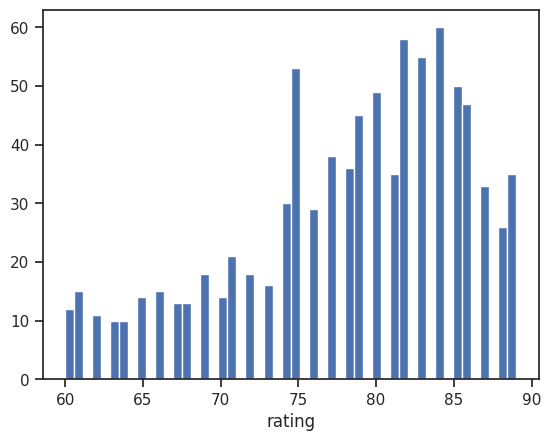

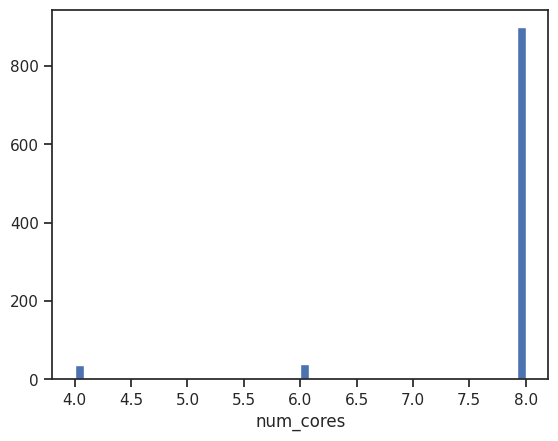

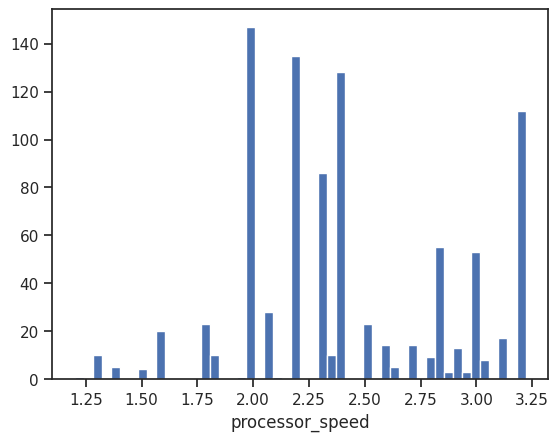

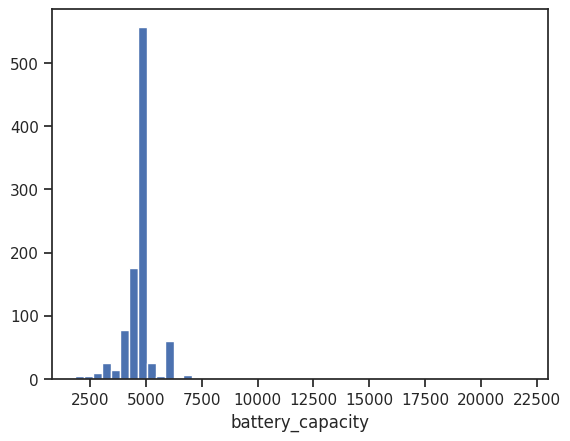

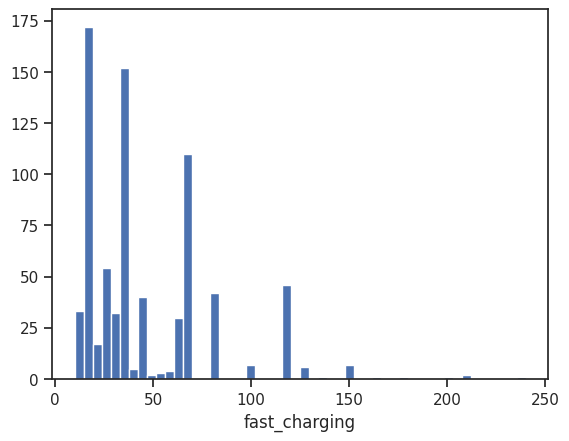

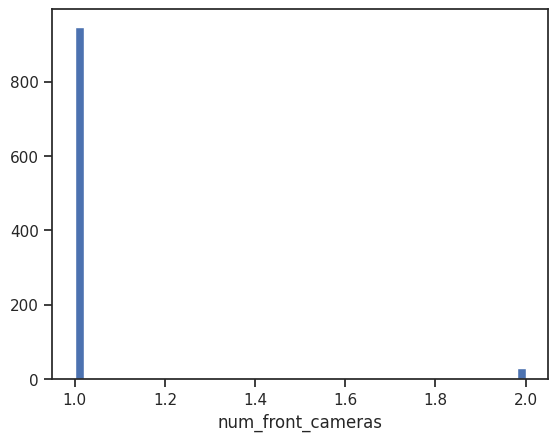

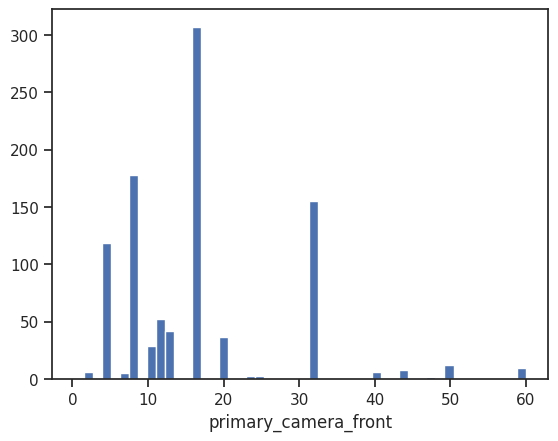

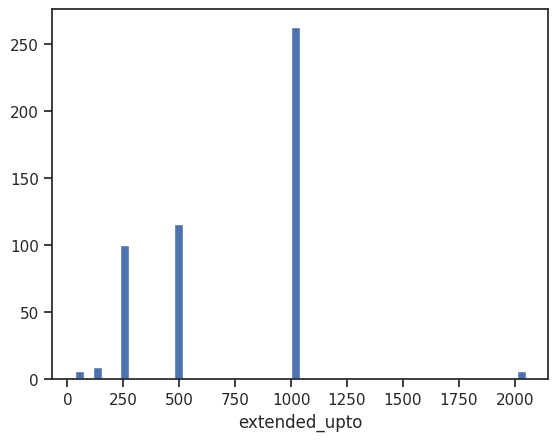

In [15]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [17]:
data_num_pit = data_num[['battery_capacity']]

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

Фильтр для проверки заполнения пустых значений:

In [19]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_pit)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

Проведем импьютацию различными показателями центра распределения:

In [20]:
strategies=['mean', 'median', 'most_frequent']

In [21]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_pit)
    return data_num_imp[mask_missing_values_only]

In [22]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([4817.74819401, 4817.74819401, 4817.74819401, 4817.74819401,
        4817.74819401, 4817.74819401, 4817.74819401, 4817.74819401,
        4817.74819401, 4817.74819401, 4817.74819401]))

In [23]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
        5000., 5000.]))

In [24]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
        5000., 5000.]))

Создадим функцию, позволяющую задавать столбец и вид импьютации:

In [25]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

Проверим работу функции по емкости батерии смартфона:

In [27]:
data[['battery_capacity']].describe()

,battery_capacity
count,969.000000
mean,4817.748194
std,1009.540054
min,1821.000000
25%,4500.000000
50%,5000.000000
75%,5000.000000
max,22000.000000


In [28]:
test_num_impute_col(data, 'battery_capacity', strategies[0])

('battery_capacity', 'mean', 11, 4817.748194014448, 4817.748194014448)

In [29]:
test_num_impute_col(data, 'battery_capacity', strategies[1])

('battery_capacity', 'median', 11, 5000.0, 5000.0)

In [30]:
test_num_impute_col(data, 'battery_capacity', strategies[2])

('battery_capacity', 'most_frequent', 11, 5000.0, 5000.0)

#### Обработка пропусков в категориальных данных

Так как в датасете нет пропусков среди столбца "Модель", то искуственно подправим датасет и загрузим его:

In [31]:
data_mod = pd.read_csv('smartphones_cleaned_v6_2.csv')

Проверим категориальный признак:

In [32]:
cat_cols = []
for col in data.columns:
    temp_null_count = data_mod[data_mod[col].isnull()].shape[0]
    dt = str(data_mod[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Столбец {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Столбец model. Тип данных object. Количество пустых значений 4, 0.41%.
Столбец processor_brand. Тип данных object. Количество пустых значений 20, 2.04%.
Столбец os. Тип данных object. Количество пустых значений 14, 1.43%.


In [33]:
cat_temp_data = data_mod[['model']]
cat_temp_data.head()

,model
0,OnePlus 11 5G
1,OnePlus Nord CE 2 Lite 5G
2,Samsung Galaxy A14 5G
3,Motorola Moto G62 5G
4,Realme 10 Pro Plus


In [34]:
cat_temp_data['model'].unique()

array(['OnePlus 11 5G', 'OnePlus Nord CE 2 Lite 5G',
       'Samsung Galaxy A14 5G', 'Motorola Moto G62 5G',
       'Realme 10 Pro Plus', 'Samsung Galaxy F23 5G (6GB RAM + 128GB)',
       'Apple iPhone 14', 'Xiaomi Redmi Note 12 Pro Plus',
       'Nothing Phone 1', 'OnePlus Nord 2T 5G', nan, 'Oppo A78',
       'Xiaomi Redmi Note 12 Pro 5G', 'Vivo T1 5G (6GB RAM + 128GB)',
       'Samsung Galaxy S23 Ultra 5G', 'Apple iPhone 13', 'Vivo Y16',
       'OPPO Reno 9 Pro Plus', 'OnePlus 10R 5G', 'Vivo Y22',
       'OnePlus 11R', 'Vivo V25 Pro 5G', 'Poco X4 Pro 5G',
       'Xiaomi Redmi Note 12', 'Vivo V26 Pro', 'Samsung Galaxy S20 FE 5G',
       'OnePlus Nord CE 2 Lite 5G (8GB RAM + 128GB)',
       'Apple iPhone 14 Pro Max', 'Vivo V25 5G', 'OnePlus 11 Pro',
       'Realme 10 Pro (8GB RAM + 128GB)', 'Poco X5 Pro', 'Vivo V27',
       'Apple iPhone 11', 'Samsung Galaxy M53 5G',
       'Samsung Galaxy S21 FE 5G', 'Oppo Reno 8T',
       'Samsung Galaxy S22 Ultra 5G', 'Xiaomi Redmi Note 12 Pro Max 5

In [35]:
cat_temp_data[cat_temp_data['model'].isnull()].shape

(4, 1)

In [36]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['OnePlus 11 5G'],
       ['OnePlus Nord CE 2 Lite 5G'],
       ['Samsung Galaxy A14 5G'],
       ['Motorola Moto G62 5G'],
       ['Realme 10 Pro Plus'],
       ['Samsung Galaxy F23 5G (6GB RAM + 128GB)'],
       ['Apple iPhone 14'],
       ['Xiaomi Redmi Note 12 Pro Plus'],
       ['Nothing Phone 1'],
       ['OnePlus Nord 2T 5G'],
       ['Apple iPhone 11'],
       ['Oppo A78'],
       ['Xiaomi Redmi Note 12 Pro 5G'],
       ['Vivo T1 5G (6GB RAM + 128GB)'],
       ['Samsung Galaxy S23 Ultra 5G'],
       ['Apple iPhone 13'],
       ['Vivo Y16'],
       ['OPPO Reno 9 Pro Plus'],
       ['OnePlus 10R 5G'],
       ['Vivo Y22'],
       ['OnePlus 11R'],
       ['Vivo V25 Pro 5G'],
       ['Poco X4 Pro 5G'],
       ['Xiaomi Redmi Note 12'],
       ['Vivo V26 Pro'],
       ['Samsung Galaxy S20 FE 5G'],
       ['OnePlus Nord CE 2 Lite 5G (8GB RAM + 128GB)'],
       ['Apple iPhone 14 Pro Max'],
       ['Vivo V25 5G'],
       ['OnePlus 11 Pro'],
       ['Realme 10 Pro (8GB RAM + 128GB)

In [37]:
np.unique(data_imp2)

array(['Apple iPhone 11', 'Apple iPhone 11 (128GB)',
       'Apple iPhone 11 Pro Max', 'Apple iPhone 12',
       'Apple iPhone 12 (128GB)', 'Apple iPhone 12 (256GB)',
       'Apple iPhone 12 Mini', 'Apple iPhone 12 Mini (128GB)',
       'Apple iPhone 12 Mini (256GB)', 'Apple iPhone 12 Pro (256GB)',
       'Apple iPhone 12 Pro (512GB)', 'Apple iPhone 13',
       'Apple iPhone 13 (256GB)', 'Apple iPhone 13 (512GB)',
       'Apple iPhone 13 Mini', 'Apple iPhone 13 Pro',
       'Apple iPhone 13 Pro (1TB)', 'Apple iPhone 13 Pro (256GB)',
       'Apple iPhone 13 Pro Max', 'Apple iPhone 13 Pro Max (1TB)',
       'Apple iPhone 13 Pro Max (256GB)', 'Apple iPhone 14',
       'Apple iPhone 14 (256GB)', 'Apple iPhone 14 (512GB)',
       'Apple iPhone 14 Mini', 'Apple iPhone 14 Plus',
       'Apple iPhone 14 Plus (256GB)', 'Apple iPhone 14 Plus (512GB)',
       'Apple iPhone 14 Pro', 'Apple iPhone 14 Pro (1TB)',
       'Apple iPhone 14 Pro (256GB)', 'Apple iPhone 14 Pro Max',
       'Apple iPhone 1

Импьютация константой:

In [38]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='???')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['OnePlus 11 5G'],
       ['OnePlus Nord CE 2 Lite 5G'],
       ['Samsung Galaxy A14 5G'],
       ['Motorola Moto G62 5G'],
       ['Realme 10 Pro Plus'],
       ['Samsung Galaxy F23 5G (6GB RAM + 128GB)'],
       ['Apple iPhone 14'],
       ['Xiaomi Redmi Note 12 Pro Plus'],
       ['Nothing Phone 1'],
       ['OnePlus Nord 2T 5G'],
       ['???'],
       ['Oppo A78'],
       ['Xiaomi Redmi Note 12 Pro 5G'],
       ['Vivo T1 5G (6GB RAM + 128GB)'],
       ['Samsung Galaxy S23 Ultra 5G'],
       ['Apple iPhone 13'],
       ['Vivo Y16'],
       ['OPPO Reno 9 Pro Plus'],
       ['OnePlus 10R 5G'],
       ['Vivo Y22'],
       ['OnePlus 11R'],
       ['Vivo V25 Pro 5G'],
       ['Poco X4 Pro 5G'],
       ['Xiaomi Redmi Note 12'],
       ['Vivo V26 Pro'],
       ['Samsung Galaxy S20 FE 5G'],
       ['OnePlus Nord CE 2 Lite 5G (8GB RAM + 128GB)'],
       ['Apple iPhone 14 Pro Max'],
       ['Vivo V25 5G'],
       ['OnePlus 11 Pro'],
       ['Realme 10 Pro (8GB RAM + 128GB)'],
       [

In [39]:
np.unique(data_imp3)

array(['???', 'Apple iPhone 11', 'Apple iPhone 11 (128GB)',
       'Apple iPhone 11 Pro Max', 'Apple iPhone 12',
       'Apple iPhone 12 (128GB)', 'Apple iPhone 12 (256GB)',
       'Apple iPhone 12 Mini', 'Apple iPhone 12 Mini (128GB)',
       'Apple iPhone 12 Mini (256GB)', 'Apple iPhone 12 Pro (256GB)',
       'Apple iPhone 12 Pro (512GB)', 'Apple iPhone 13',
       'Apple iPhone 13 (256GB)', 'Apple iPhone 13 (512GB)',
       'Apple iPhone 13 Mini', 'Apple iPhone 13 Pro',
       'Apple iPhone 13 Pro (1TB)', 'Apple iPhone 13 Pro (256GB)',
       'Apple iPhone 13 Pro Max', 'Apple iPhone 13 Pro Max (1TB)',
       'Apple iPhone 13 Pro Max (256GB)', 'Apple iPhone 14',
       'Apple iPhone 14 (256GB)', 'Apple iPhone 14 (512GB)',
       'Apple iPhone 14 Mini', 'Apple iPhone 14 Plus',
       'Apple iPhone 14 Plus (256GB)', 'Apple iPhone 14 Plus (512GB)',
       'Apple iPhone 14 Pro', 'Apple iPhone 14 Pro (1TB)',
       'Apple iPhone 14 Pro (256GB)', 'Apple iPhone 14 Pro Max',
       'Apple i

In [40]:
data_imp3[data_imp3==0].size

0

In [41]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,OnePlus 11 5G
1,OnePlus Nord CE 2 Lite 5G
2,Samsung Galaxy A14 5G
3,Motorola Moto G62 5G
4,Realme 10 Pro Plus
...,...
975,Motorola Moto Edge S30 Pro
976,Honor X8 5G
977,POCO X4 GT 5G (8GB RAM + 256GB)
978,Motorola Moto G91 5G


### Кодирование категориальных признаков

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
cat_enc['c1'].unique()

array(['OnePlus 11 5G', 'OnePlus Nord CE 2 Lite 5G',
       'Samsung Galaxy A14 5G', 'Motorola Moto G62 5G',
       'Realme 10 Pro Plus', 'Samsung Galaxy F23 5G (6GB RAM + 128GB)',
       'Apple iPhone 14', 'Xiaomi Redmi Note 12 Pro Plus',
       'Nothing Phone 1', 'OnePlus Nord 2T 5G', 'Apple iPhone 11',
       'Oppo A78', 'Xiaomi Redmi Note 12 Pro 5G',
       'Vivo T1 5G (6GB RAM + 128GB)', 'Samsung Galaxy S23 Ultra 5G',
       'Apple iPhone 13', 'Vivo Y16', 'OPPO Reno 9 Pro Plus',
       'OnePlus 10R 5G', 'Vivo Y22', 'OnePlus 11R', 'Vivo V25 Pro 5G',
       'Poco X4 Pro 5G', 'Xiaomi Redmi Note 12', 'Vivo V26 Pro',
       'Samsung Galaxy S20 FE 5G',
       'OnePlus Nord CE 2 Lite 5G (8GB RAM + 128GB)',
       'Apple iPhone 14 Pro Max', 'Vivo V25 5G', 'OnePlus 11 Pro',
       'Realme 10 Pro (8GB RAM + 128GB)', 'Poco X5 Pro', 'Vivo V27',
       'Samsung Galaxy M53 5G', 'Samsung Galaxy S21 FE 5G',
       'Oppo Reno 8T', 'Samsung Galaxy S22 Ultra 5G',
       'Xiaomi Redmi Note 12 Pro Max

In [44]:
le = LabelEncoder()

In [45]:
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [46]:
le.classes_

array(['Apple iPhone 11', 'Apple iPhone 11 (128GB)',
       'Apple iPhone 11 Pro Max', 'Apple iPhone 12',
       'Apple iPhone 12 (128GB)', 'Apple iPhone 12 (256GB)',
       'Apple iPhone 12 Mini', 'Apple iPhone 12 Mini (128GB)',
       'Apple iPhone 12 Mini (256GB)', 'Apple iPhone 12 Pro (256GB)',
       'Apple iPhone 12 Pro (512GB)', 'Apple iPhone 13',
       'Apple iPhone 13 (256GB)', 'Apple iPhone 13 (512GB)',
       'Apple iPhone 13 Mini', 'Apple iPhone 13 Pro',
       'Apple iPhone 13 Pro (1TB)', 'Apple iPhone 13 Pro (256GB)',
       'Apple iPhone 13 Pro Max', 'Apple iPhone 13 Pro Max (1TB)',
       'Apple iPhone 13 Pro Max (256GB)', 'Apple iPhone 14',
       'Apple iPhone 14 (256GB)', 'Apple iPhone 14 (512GB)',
       'Apple iPhone 14 Mini', 'Apple iPhone 14 Plus',
       'Apple iPhone 14 Plus (256GB)', 'Apple iPhone 14 Plus (512GB)',
       'Apple iPhone 14 Pro', 'Apple iPhone 14 Pro (1TB)',
       'Apple iPhone 14 Pro (256GB)', 'Apple iPhone 14 Pro Max',
       'Apple iPhone 1

In [47]:
cat_enc_le

array([307, 327, 531, 198, 414, 575,  21, 917, 225, 322,   0, 346, 915,
       696, 634,  11, 763, 291, 301, 773, 309, 729, 404, 907, 731, 613,
       328,  31, 727, 308, 413, 408, 732,   0, 599, 618, 364, 628, 916,
       289, 330, 894, 160, 415, 780, 594, 887, 461, 765, 561, 532, 951,
       137, 204, 410, 444,  25,   0, 633, 188, 922, 689, 538, 774, 396,
       690, 298, 918, 574, 350, 243, 721, 960, 304, 886,  60,  15, 272,
       548, 839, 201, 533, 432, 697, 586, 161, 540, 279, 888, 559, 769,
       318, 197, 747, 462, 441, 242, 937, 737, 695,  28, 893, 206, 416,
       266, 811, 733, 623, 693, 302, 662,   3, 867, 554, 860, 296, 600,
       961, 686, 631, 164, 321,  71, 123, 595, 720, 190, 329, 546,  74,
       846, 876, 177, 227, 405, 896,   1, 465, 277, 948, 956, 290, 395,
       140, 319, 567, 939,   0, 832,   6, 908, 192,  38, 348, 132, 454,
       269, 417, 351, 430,  56,  18, 359, 745, 569, 883, 411, 945, 111,
       152, 923, 489, 256,  41, 959, 902, 484, 793, 726, 376, 13

In [48]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [49]:
le.inverse_transform([ 0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
       260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
       286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304])

array(['Apple iPhone 11', 'Apple iPhone 11 (128GB)',
       'Apple iPhone 11 Pro Max', 'Apple iPhone 12',
       'Apple iPhone 12 (128GB)', 'Apple iPhone 12 (256GB)',
       'Apple iPhone 12 Mini', 'Apple iPhone 12 Mini (128GB)',
       'Apple iPhone 12 Mini (256GB)', 'Apple iPhone 12 Pro (256GB)',
       'Apple iPhone 12 Pro (512GB)', 'Apple iPhone 13',
       'Apple iPhone 13 (256GB)', 'Apple iPhone 13 (512GB)',
       'Apple iPhone 13 Mini', 'Apple iPhone 13 Pro',
       'Apple iPhone 13 Pro (1TB)', 'Apple iPhone 13 Pro (256GB)',
       'Apple iPhone 13 Pro Max', 'Apple iPhone 13 Pro Max (1TB)',
       'Apple iPhone 13 Pro Max (256GB)', 'Apple iPhone 14',
       'Apple iPhone 14 (256GB)', 'Apple iPhone 14 (512GB)',
       'Apple iPhone 14 Mini', 'Apple iPhone 14 Plus',
       'Apple iPhone 14 Plus (256GB)', 'Apple iPhone 14 Plus (512GB)',
       'Apple iPhone 14 Pro', 'Apple iPhone 14 Pro (1TB)',
       'Apple iPhone 14 Pro (256GB)', 'Apple iPhone 14 Pro Max',
       'Apple iPhone 1

In [50]:
from sklearn.preprocessing import OrdinalEncoder

In [52]:
data_oe = data_mod[['model', 'screen_size']]
data_oe.head()

,model,screen_size
0,OnePlus 11 5G,6.70
1,OnePlus Nord CE 2 Lite 5G,6.59
2,Samsung Galaxy A14 5G,6.60
3,Motorola Moto G62 5G,6.55
4,Realme 10 Pro Plus,6.70


In [53]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='???')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['OnePlus 11 5G', 6.7],
       ['OnePlus Nord CE 2 Lite 5G', 6.59],
       ['Samsung Galaxy A14 5G', 6.6],
       ...,
       ['POCO X4 GT 5G (8GB RAM + 256GB)', 6.6],
       ['Motorola Moto G91 5G', 6.8],
       ['Samsung Galaxy M52s 5G', 6.5]], dtype=object)

In [54]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[308.,  52.],
       [328.,  45.],
       [532.,  46.],
       ...,
       [381.,  46.],
       [206.,  60.],
       [599.,  36.]])

In [55]:
np.unique(cat_enc_oe[:, 0])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [56]:
np.unique(cat_enc_oe[:, 1])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78.])

In [57]:
oe.categories_

[array(['???', 'Apple iPhone 11', 'Apple iPhone 11 (128GB)',
        'Apple iPhone 11 Pro Max', 'Apple iPhone 12',
        'Apple iPhone 12 (128GB)', 'Apple iPhone 12 (256GB)',
        'Apple iPhone 12 Mini', 'Apple iPhone 12 Mini (128GB)',
        'Apple iPhone 12 Mini (256GB)', 'Apple iPhone 12 Pro (256GB)',
        'Apple iPhone 12 Pro (512GB)', 'Apple iPhone 13',
        'Apple iPhone 13 (256GB)', 'Apple iPhone 13 (512GB)',
        'Apple iPhone 13 Mini', 'Apple iPhone 13 Pro',
        'Apple iPhone 13 Pro (1TB)', 'Apple iPhone 13 Pro (256GB)',
        'Apple iPhone 13 Pro Max', 'Apple iPhone 13 Pro Max (1TB)',
        'Apple iPhone 13 Pro Max (256GB)', 'Apple iPhone 14',
        'Apple iPhone 14 (256GB)', 'Apple iPhone 14 (512GB)',
        'Apple iPhone 14 Mini', 'Apple iPhone 14 Plus',
        'Apple iPhone 14 Plus (256GB)', 'Apple iPhone 14 Plus (512GB)',
        'Apple iPhone 14 Pro', 'Apple iPhone 14 Pro (1TB)',
        'Apple iPhone 14 Pro (256GB)', 'Apple iPhone 14 Pro Max',

In [58]:
oe.inverse_transform(cat_enc_oe)

array([['OnePlus 11 5G', 6.7],
       ['OnePlus Nord CE 2 Lite 5G', 6.59],
       ['Samsung Galaxy A14 5G', 6.6],
       ...,
       ['POCO X4 GT 5G (8GB RAM + 256GB)', 6.6],
       ['Motorola Moto G91 5G', 6.8],
       ['Samsung Galaxy M52s 5G', 6.5]], dtype=object)

### Нормализация числовых признаков

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [62]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['screen_size']])

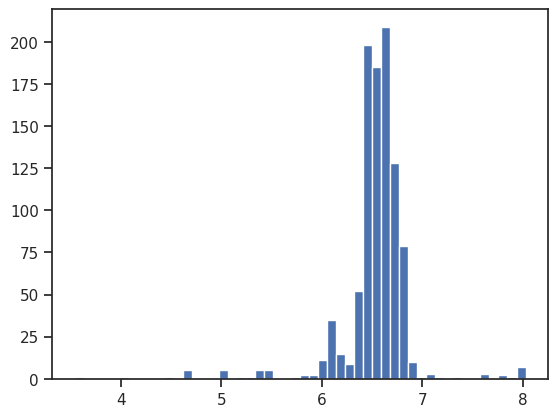

In [63]:
plt.hist(data['screen_size'], 50)
plt.show()

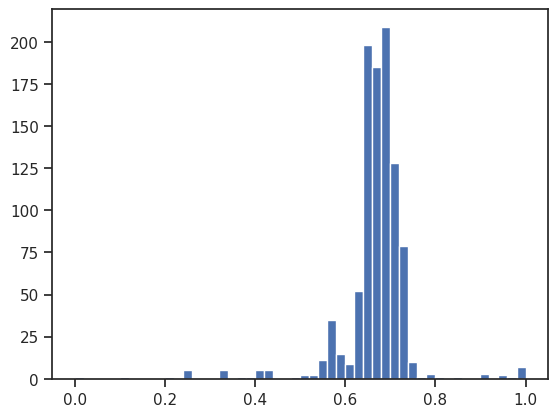

In [64]:
plt.hist(sc1_data, 50)
plt.show()

In [66]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['screen_size']])

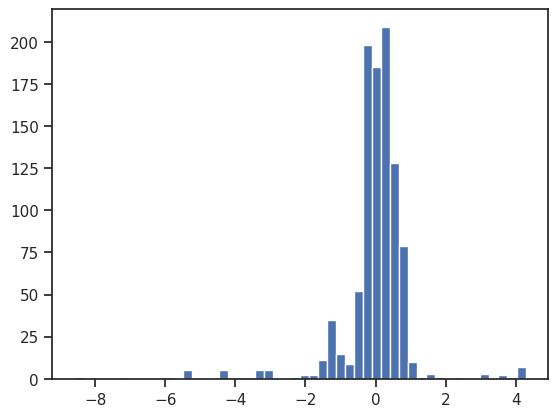

In [67]:
plt.hist(sc2_data, 50)
plt.show()